#Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid

#Dataset Preparation

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255
X_test=X_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


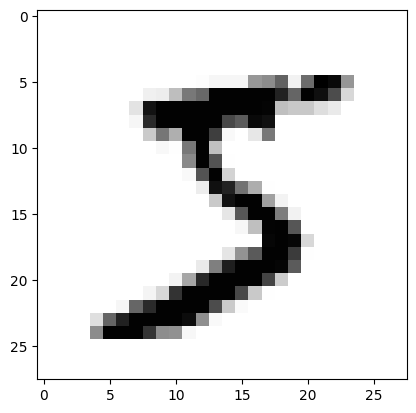

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

#Model Architecture and Training

In [ ]:
model=tf.keras.models.Sequential([
    layers.Input(X_train.shape[1:]),
    layers.Flatten(),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Model = model.fit(X_train,y_train,epochs=20,batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4663 - accuracy: 0.8781 - val_loss: 0.3049 - val_accuracy: 0.9162
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.9154 - val_loss: 0.2867 - val_accuracy: 0.9200
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2831 - accuracy: 0.9208 - val_loss: 0.2717 - val_accuracy: 0.9241
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9233 - val_loss: 0.2685 - val_accuracy: 0.9244
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9257 - val_loss: 0.2715 - val_accuracy: 0.9235
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2621 - accuracy: 0.9276 - val_loss: 0.2637 - val_accuracy: 0.9280
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9282 - val_loss: 0.2653 - val_accuracy:

#Model Evaluation

In [ ]:
model.evaluate(X_train,y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2325 - accuracy: 0.9360


[0.23254749178886414, 0.9359833598136902]

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9281


[0.26708370447158813, 0.9280999898910522]

1/1 [==============================] - 0s 132ms/step
[1.8781190e-08 8.2107125e-14 1.4792344e-07 3.2048756e-03 9.3896638e-08
 1.9237754e-05 3.1306558e-14 9.9657553e-01 8.9416526e-06 1.9108799e-04] ==> 7


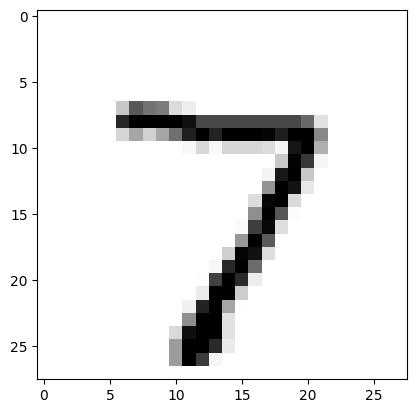

[2.4565928e-05 1.2606473e-06 9.9597496e-01 4.0199729e-06 7.7031671e-17
 1.9501125e-03 2.0333356e-03 2.9242536e-22 1.1803363e-05 8.5217704e-20] ==> 2


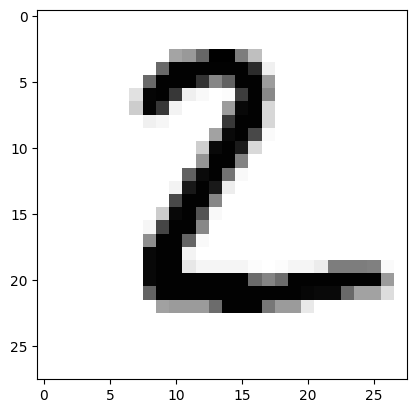

[2.2176278e-07 9.8781592e-01 8.1159025e-03 1.3495940e-03 5.4212462e-05
 5.5785151e-04 4.9836305e-04 2.2820564e-05 1.4734634e-03 1.1169875e-04] ==> 1


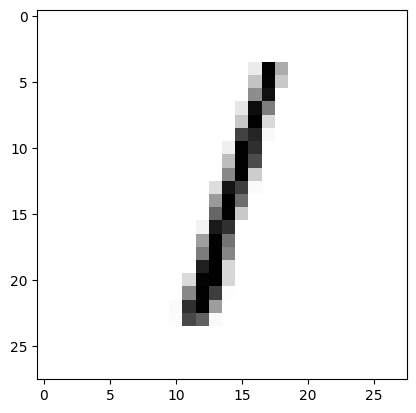

[9.9982375e-01 1.0350225e-11 3.3667628e-05 1.9334475e-06 2.5027061e-08
 4.1924737e-05 8.1513390e-05 4.2284983e-06 7.0871783e-06 6.0198940e-06] ==> 0


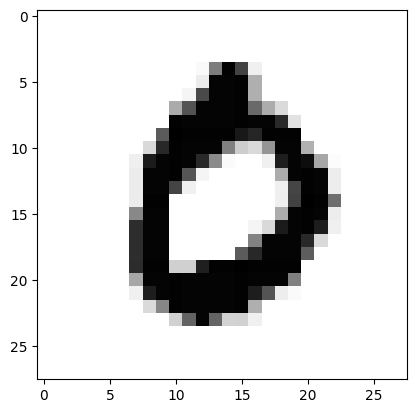

[2.1899526e-04 3.0885577e-08 9.1463665e-04 6.3701996e-06 9.7466850e-01
 6.0457736e-05 8.6933572e-04 1.4832680e-03 1.6769466e-03 2.0101469e-02] ==> 4


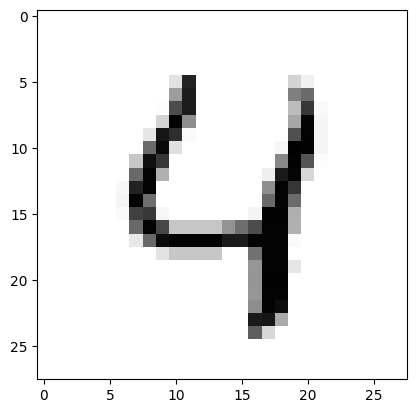

In [ ]:
probs=model.predict(X_test[:5])
pred = np.argmax(probs,axis=1)
for i in range(5):
  print(probs[i],"==>",pred[i])
  plt.imshow(X_test[i],cmap='Greys')
  plt.show()

313/313 [==============================] - 0s 1ms/step


<Axes: >

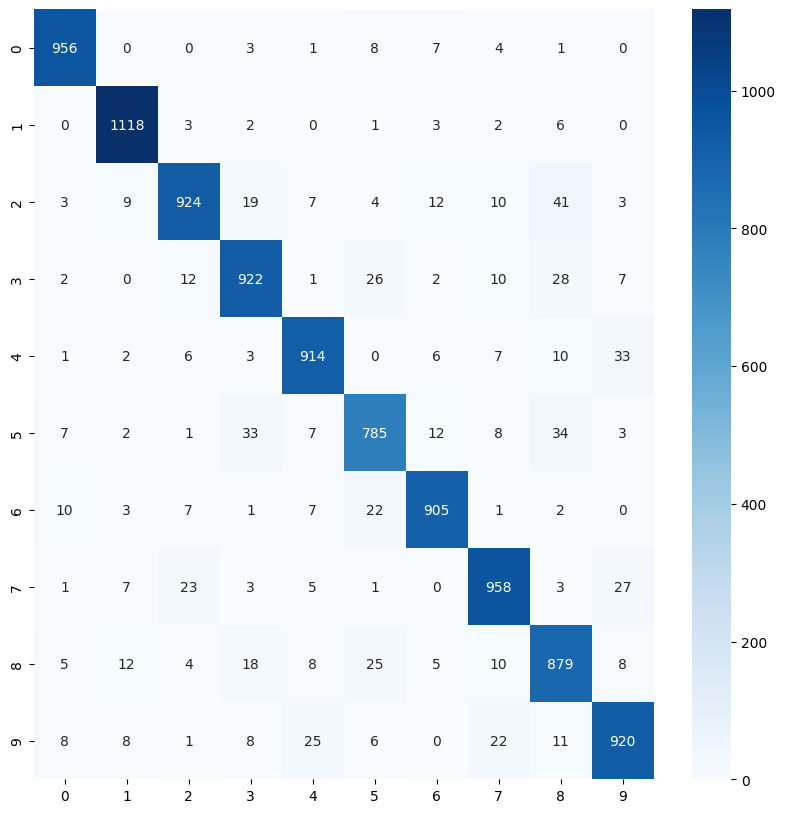

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='micro'))
print(recall_score(y_test,y_pred,average='micro'))
print(f1_score(y_test,y_pred,average='micro'))

0.9281
0.9281
0.9281
0.9281000000000001


#Overfit/Underfit Analysis

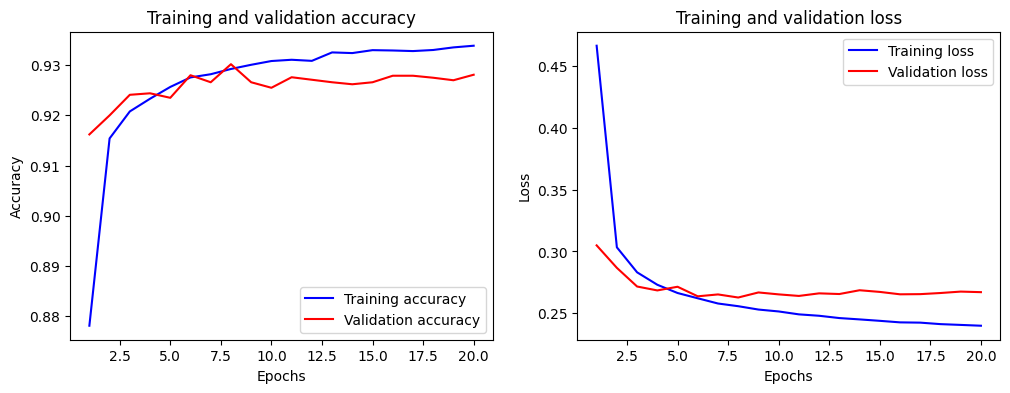

In [ ]:
accuracy = Model.history['accuracy']
val_accuracy = Model.history['val_accuracy']
loss = Model.history['loss']
val_loss = Model.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()